In [1]:
import numpy as np
import matplotlib.pyplot as plt
from face_load import load_data
from convnet import ConvNet
from optimizer import *

from sklearn.utils import shuffle

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

X_train, y_train = X_train[:20000], y_train[:20000]
X_test, y_test = X_test[:5000], y_test[:5000]

network = ConvNet(input_shape=(1,50,50), conv_num=3,
                  conv_param=[{'filter_num':32, 'filter_size':11, 'pad':10, 'stride':1, 'pool_size':2},
                              {'filter_num':64, 'filter_size':7, 'pad':4, 'stride':1, 'pool_size':2},
                              {'filter_num':128, 'filter_size':5, 'pad':0, 'stride':1, 'pool_size':2}],
                  hidden_size_list=([1024, 256, 64]), output_size=2, weight_init_std=0.01)

train_acc_list = []
test_acc_list = []
train_loss_list = []

iters_num = 15000
train_size = X_train.shape[0]
batch_size = 100

iter_per_epoch = int(max(train_size/batch_size, 1))
max_epoch = iters_num / iter_per_epoch

load_param = False
training = True

optimizer = Adam()
network.model()

Conv1: (32, 1, 11, 11)
Conv2: (64, 32, 7, 7)
Conv3: (128, 64, 5, 5)
Affine1: (4608, 1024)
Affine2: (1024, 256)
Affine3: (256, 64)
Affine4: (64, 2)


In [3]:
if load_param:
    network.load_params('saved_params_face_20_5_8000_100.pkl')
    
if training:
    for i in range(iters_num):
        batch_mask = np.random.choice(train_size, batch_size)
        X_batch = X_train[batch_mask]
        y_batch = y_train[batch_mask]

        grads = network.gradient(X_batch, y_batch)

        optimizer.update(network.params, grads)

        train_loss = network.loss(X_batch, y_batch)
        train_loss_list.append(train_loss)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(X_batch, y_batch)
            test_batch = np.random.choice(X_test.shape[0], batch_size)
            test_acc = network.accuracy(X_test[test_batch], y_test[test_batch])
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            print("\nEpoch: " + str(int(i//iter_per_epoch)+1) +
                  "/"+str(int(max_epoch))+"| train acc, test acc: " + str(train_acc) + ", " + str(test_acc))
            count = 1

        print("\rtrain loss({}/{}): {}".format(count, int(iter_per_epoch), str(train_loss)),end="")
        count += 1


    print("\n===== Final train, test acc: " + str(network.accuracy(X_train[:100], y_train[:100]))
          + ", " + str(network.accuracy(X_test[:100], y_test[:100])) + " =====")

    network.save_params("saved_params_face_conv-num-3_3.pkl")


Epoch: 1/75| train acc, test acc: 0.64, 0.46
train loss(200/200): 0.19434223537107336
Epoch: 2/75| train acc, test acc: 0.94, 0.91
train loss(200/200): 0.16730296329950123
Epoch: 3/75| train acc, test acc: 0.99, 0.91
train loss(200/200): 0.205531158350644566
Epoch: 4/75| train acc, test acc: 0.95, 0.96
train loss(200/200): 0.09847021483598402
Epoch: 5/75| train acc, test acc: 0.93, 0.96
train loss(200/200): 0.102672531144971535
Epoch: 6/75| train acc, test acc: 0.97, 0.87
train loss(200/200): 0.114354181028500096
Epoch: 7/75| train acc, test acc: 0.94, 0.91
train loss(200/200): 0.093557147526236556
Epoch: 8/75| train acc, test acc: 0.98, 0.97
train loss(200/200): 0.125931639227814924
Epoch: 9/75| train acc, test acc: 0.98, 0.92
train loss(200/200): 0.078642872019888864
Epoch: 10/75| train acc, test acc: 0.96, 0.91
train loss(200/200): 0.122762017956700075
Epoch: 11/75| train acc, test acc: 0.99, 0.93
train loss(200/200): 0.057247797299854825
Epoch: 12/75| train acc, test acc: 0.99, 0.

KeyboardInterrupt: 

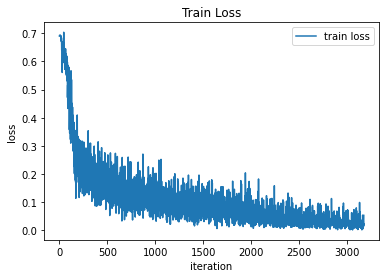

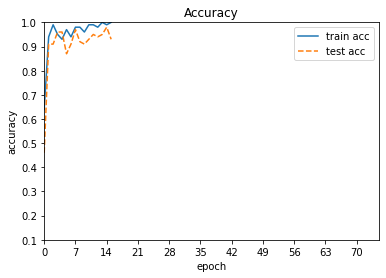

In [4]:
if training:
    plt.plot(train_loss_list[:], '-')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.title('Train Loss')
    plt.legend(['train loss'])
    plt.show()

    plt.plot(train_acc_list[:], '-')
    plt.plot(test_acc_list[:], '--')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.ylim(0.1, 1)
    plt.xlim(0, max_epoch)
    plt.xticks(range(0, int(max_epoch)+1, max(1, int(max_epoch//10))))
    plt.title('Accuracy')
    plt.legend(['train acc', 'test acc'])
    plt.show()

In [5]:
network.save_params("saved_params_face_conv-num-3_3.pkl")

params save complete!: saved_params_face_conv-num-3_3.pkl
